In [2]:
import numpy as np  # Bibliothèque fondamentale pour le calcul scientifique en Python
import tensorflow as tf  # Bibliothèque de machine learning pour créer, entraîner et déployer des modèles de deep learning et de machine learning

from tensorflow.keras import layers, Sequential  # Modules pour créer des couches de réseaux neuronaux et des modèles séquentiels
from tensorflow.keras.models import Model  # Modules pour créer des modèles personnalisés avec plusieurs entrées et sorties

# Couches Keras pour construire des modèles de deep learning
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, BatchNormalization

# Modules pour le prétraitement des images
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

# Callbacks pour le contrôle de l'entraînement des modèles
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Optimiseur pour les modèles
from tensorflow.keras.optimizers import Adam

import pathlib  # Bibliothèque pour travailler avec les chemins de fichiers et les répertoires

from tensorflow.keras.regularizers import l2  # Régularisation L2 pour les réseaux neuronaux

from sklearn.preprocessing import StandardScaler  # Bibliothèque pour normaliser les fonctionnalités en supprimant la moyenne et en ajustant à l'écart type unitaire

import matplotlib.pyplot as plt  # Bibliothèque de traçage en 2D pour créer des graphiques et des visualisations interactives
import seaborn as sns  # Bibliothèque de visualisation basée sur Matplotlib pour dessiner des graphiques statistiques attrayants et informatifs

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Modules pour calculer et afficher la matrice de confusion

In [ ]:
# *** Étape 1 : Charger et Préparer les Données ***
data_path = '/content/Data'
data_directory = pathlib.Path(data_path)
image_width, image_height = 224, 224
batch_size = 32                                        #### TAILLE DE LOTS KOL ITERATION
validation_split = 0.2

num_classes = ['Curly hair','Straight Hair','Wavy Hair']

try:
    train_data = tf.keras.utils.image_dataset_from_directory(
        data_directory,
        validation_split=validation_split,
        subset='training',
        labels='inferred',                                            #####CHARGEMENT
        label_mode='categorical',
        image_size=(image_width, image_height),
        batch_size=batch_size,
        shuffle=True,
        seed=123
    )

    validation_data = tf.keras.utils.image_dataset_from_directory(          ####validation
        data_directory,
        validation_split=validation_split,
        subset='validation',
        labels='inferred',
        label_mode='categorical',
        image_size=(image_width, image_height),                           #####TRAIN
        batch_size=batch_size,
        shuffle=True,
        seed=123
    )
except Exception as e:
    print(f"Erreur lors du chargement des données : {e}")            ######EXCEPT CAS ERREUR
    raise



### 2. **Normalisation des Images**
   - **Application de la normalisation** : Chaque image est normalisée en divisant les valeurs des pixels par 255, ce qui permet de les amener dans la plage [0, 1].



In [4]:
from tensorflow.keras.layers import Rescaling  # Import Rescaling

In [5]:
# *** Étape 2 : Normalisation des Images ***
normalization_layer = Rescaling(1.0 / 255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
validation_data = validation_data.map(lambda x, y: (normalization_layer(x), y))

# CNN From Scratch

In [6]:
# Définir les dimensions des images et le nombre de classes
IMG_WIDTH, IMG_HEIGHT = 224, 224                    #### DIMENSION INPUT TAILLE YAB9A NAFSSSOU BAED EL CONV

# Créer le modèle CNN
cnn_model = Sequential() ###CREATION MODELE CNN
###couche convolutionnelle  32 filtres de taille 3x3 RELU NON linearité
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), name='conv_block1_layer1'))
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_block1_layer2'))     ###BLOC CONVOLUTION 1+ POOLING
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_block1_layer3'))  
cnn_model.add(MaxPooling2D((2, 2), name='pool_block1')) ### MAXPOOLING REDUIT TAILLE IMAGE

cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_block2_layer1'))
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_block2_layer2'))  ####BLOC 2
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_block2_layer3'))
cnn_model.add(MaxPooling2D((2, 2), name='pool_block2'))

cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_block3_layer1'))
cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_block3_layer2'))  ##BLOC3
cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_block3_layer3'))
cnn_model.add(MaxPooling2D((2, 2), name='pool_block3'))

cnn_model.add(Flatten(name='flatten_layer'))  ###2D ---D1  CONNECTER LES COUCHES AUX COUCHES DEJA CONNECTES

cnn_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001), name='dense_layer1'))  #COUCHES CONNECTES M3AHOM
cnn_model.add(Dropout(0.5, name='dropout_layer1'))

cnn_model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001), name='dense_layer2')) #001 Reduit l'APPRENTISSAGE
cnn_model.add(Dense(3, activation='softmax', name='output_layer'))
             ##COUCHE CONNECTES MAA 3 NEURONS

# Afficher le résumé du modèle
cnn_model.summary()                      ####NONE TAILLE DE LOTS    224 DIMENSION 32 FILTRE ### 896 P

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_block1_layer1 (Conv2D)          │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_block1_layer2 (Conv2D)          │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_block1_layer3 (Conv2D)          │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_block1 (MaxPooling2D)           │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_block2_layer1 (Conv2D)          │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_block2_layer2 (Conv2D)          │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_block2_layer3 (Conv2D)          │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_block2 (MaxPooling2D)           │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_block3_layer1 (Conv2D)          │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_block3_layer2 (Conv2D)          │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_block3_layer3 (Conv2D)          │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_block3 (MaxPooling2D)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer1 (Dense)                 │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_layer1 (Dropout)             │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer2 (Dense)                 │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,993,603 (198.34 MB)

 Trainable params: 51,993,603 (198.34 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# *** Étape 4 : Compilation du Modèle ***
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  ###OPTIMISEUR ADAM (RMSrop)
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# *** Étape 5 : Définir les Callbacks ***          ##EARLY STOPPING Y7ABES EL TRAIN  KEN VAL LOSS MAYTL3CH MLI7
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5) ###REDUIT TAUX d'APPRENTISSAGE


In [10]:
# *** Étape 6 : Ajuster le Modèle ***
history = cnn_model.fit(
    train_data,
    validation_data=validation_data,                ###### AJUSTEMENT EPC+10 ama YNAJEM YA7BES 9BAL BEL EARLY STOP
    epochs=10,
    callbacks=[early_stopping_cb, reduce_lr_cb]
)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.3731 - loss: 2.3380 - val_accuracy: 0.3543 - val_loss: 1.9812 - learning_rate: 1.0000e-04
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 0.3554 - loss: 1.8923 - val_accuracy: 0.3543 - val_loss: 1.6824 - learning_rate: 1.0000e-04
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.3645 - loss: 1.6344 - val_accuracy: 0.4686 - val_loss: 1.5305 - learning_rate: 1.0000e-04
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.5042 - loss: 1.4761 - val_accuracy: 0.4571 - val_loss: 1.4604 - learning_rate: 1.0000e-04
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - accuracy: 0.5052 - loss: 1.3820 - val_accuracy: 0.5143 - val_loss: 1.3299 - learning_rate: 1.0000e-04
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.5854 - loss: 1.2826 - val_accuracy: 0.5200 - val_loss: 1.2557 - learning_rate: 1.0000e-04
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 

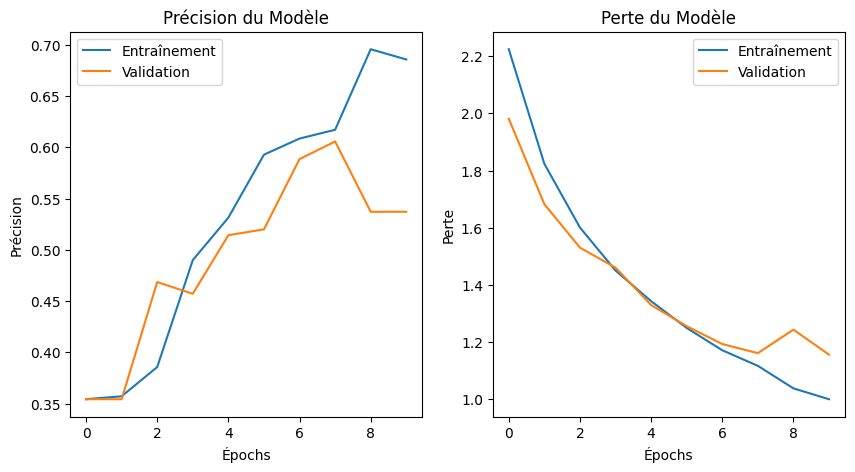

In [11]:
# *** Visualisation des Courbes d'Apprentissage ***
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Précision du Modèle')
plt.xlabel('Épochs')
plt.ylabel('Précision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Perte du Modèle')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()
plt.show()

####### NDE BEHI MELUOL BAED FAMA CHWAYA OVERFITTING 


### 7. **Évaluation du Modèle**
   - **Matrice de confusion** : Calcul de la matrice de confusion pour évaluer la performance du modèle sur les classes d'images.
   - **Affichage de la matrice de confusion** : Visualisation de la matrice de confusion pour mieux comprendre les erreurs du modèle.


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


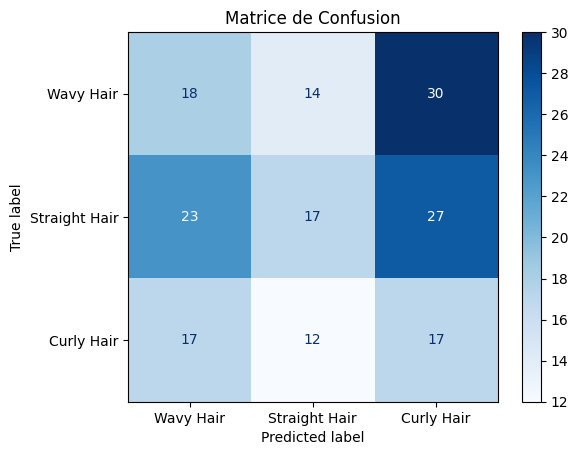

In [12]:
# *** Étape 7 : Évaluation du Modèle ***
val_labels = np.concatenate([y for _, y in validation_data], axis=0)
val_predictions = cnn_model.predict(validation_data)
val_predictions = np.argmax(val_predictions, axis=1)
val_labels = np.argmax(val_labels, axis=1)

conf_matrix = confusion_matrix(val_labels, val_predictions)
class_names =  ['Wavy Hair', 'Straight Hair', 'Curly Hair']  # Remplacez par vos classes
ConfusionMatrixDisplay(conf_matrix, display_labels=class_names).plot(cmap='Blues')
plt.title('Matrice de Confusion')
plt.show()

####### mal classe - ERREUR NOTABLES (DATA ZGHIRA - HYPERPARAMETRE)

In [13]:
# *** Étape 8 : Sauvegarde du Modèle ***
cnn_model.save('best_model_cnn.keras')



### 9. **Prédiction sur de Nouvelles Images**
   - **Prétraitement de l'image** : Une fonction pour charger, redimensionner et normaliser une image avant de faire une prédiction.
   - **Prédiction** : Le modèle effectue une prédiction sur l'image donnée et affiche la classe prédite ainsi que la confiance de la prédiction.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Classe prédite: Curly Hair, Confiance: 0.5759


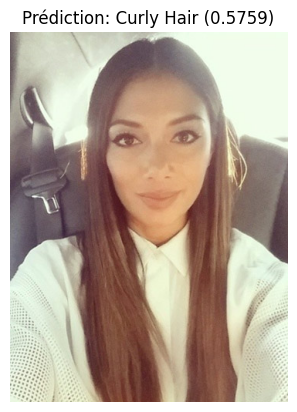

In [14]:
# *** Étape 9 : Prédiction sur de Nouvelles Images ***
def prepare_image(image_path):
    img = load_img(image_path, target_size=(image_width, image_height))
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

def predict_image(image_path):
    img_array = prepare_image(image_path)
    predictions = cnn_model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_names[predicted_class]
    print(f"Classe prédite: {predicted_label}, Confiance: {predictions[0][predicted_class]:.4f}")
    return predicted_label, predictions[0][predicted_class]

# Exemple de prédiction
sample_image_path = '/content/Data/Straight Hair/000028d73-Nicole_Scherzinger.jpg'  
predicted_label, confidence = predict_image(sample_image_path)
img = load_img(sample_image_path)
plt.imshow(img)
plt.title(f'Prédiction: {predicted_label} ({confidence:.4f})')
plt.axis('off')
plt.show()


# MobileNetV2

In [15]:
import pathlib
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Dropout, Flatten, Rescaling
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:

# Définition du chemin des données
data_dir = pathlib.Path('/content/Data')
IMG_WIDTH, IMG_HEIGHT = 224, 224
# Chargement des données d'entraînement et de validation
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    shuffle=True,
    seed=123
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    shuffle=True,
    seed=123
)


Found 875 files belonging to 3 classes.
Using 700 files for training.
Found 875 files belonging to 3 classes.
Using 175 files for validation.


In [17]:
# Normaliser les données
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))
# Définir les classes
class_names = ['Wavy Hair', 'Straight Hair', 'Curly Hair']

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.5944 - loss: 1.2804 - val_accuracy: 0.4286 - val_loss: 3.9461 - learning_rate: 0.0010
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 165ms/step - accuracy: 0.8215 - loss: 0.5906 - val_accuracy: 0.4743 - val_loss: 5.3084 - learning_rate: 0.0010
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.8871 - loss: 0.3803 - val_accuracy: 0.6629 - val_loss: 1.4095 - learning_rate: 0.0010
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.8994 - loss: 0.2466 - val_accuracy: 0.4686 - val_loss: 4.6449 - learning_rate: 0.0010
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9220 - loss: 0.2665 - val_accuracy: 0.5257 - val_loss: 1.8976 - learning_rate: 0.0010
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.9300 - loss: 0.2053 - val_accuracy: 0.3543 - val_loss: 5.1632 - learning_rate: 0.0010
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 637ms/step
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6191 - loss: 1.2418 - val_accuracy: 0.6514 - val_loss: 1.3191 - learning_rate: 0.0010
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 294ms/step - accuracy: 0.8021 - loss: 0.5722 - val_accuracy: 0.4457 - val_loss: 6.4734 - learning_rate: 0.0010
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - accuracy: 0.8963 - loss: 0.2708 - val_accuracy: 0.6286 - val_loss: 3.5788 - learning_rate: 0.0010
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.8832 - loss: 0.3231 - val_accuracy: 0.7200 - val_loss: 3.2275 - learning_rate: 0.0010
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.9139 - loss: 0.2567 - val_accuracy: 0.6686 - val_loss: 3.5835 - learning_rate: 2.0000e-04
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.9731 - loss: 0.0655 - val_accuracy: 0.6171 - val_loss: 4.5285 - learning_rate: 2.0000e-04
Validation accuracy avec 10 couches gelée

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.6190 - loss: 1.1967 - val_accuracy: 0.6286 - val_loss: 1.6629 - learning_rate: 0.0010
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 224ms/step - accuracy: 0.7828 - loss: 0.7513 - val_accuracy: 0.6286 - val_loss: 2.1788 - learning_rate: 0.0010
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.9099 - loss: 0.3012 - val_accuracy: 0.6914 - val_loss: 2.0315 - learning_rate: 0.0010
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.9146 - loss: 0.2510 - val_accuracy: 0.5029 - val_loss: 5.7148 - learning_rate: 0.0010
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - accuracy: 0.9329 - loss: 0.1669 - val_accuracy: 0.4914 - val_loss: 6.3765 - learning_rate: 2.0000e-04
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.9751 - loss: 0.0594 - val_accuracy: 0.4914 - val_loss: 7.6350 - learning_rate: 2.0000e-04
Validation accuracy avec 15 couches gelées

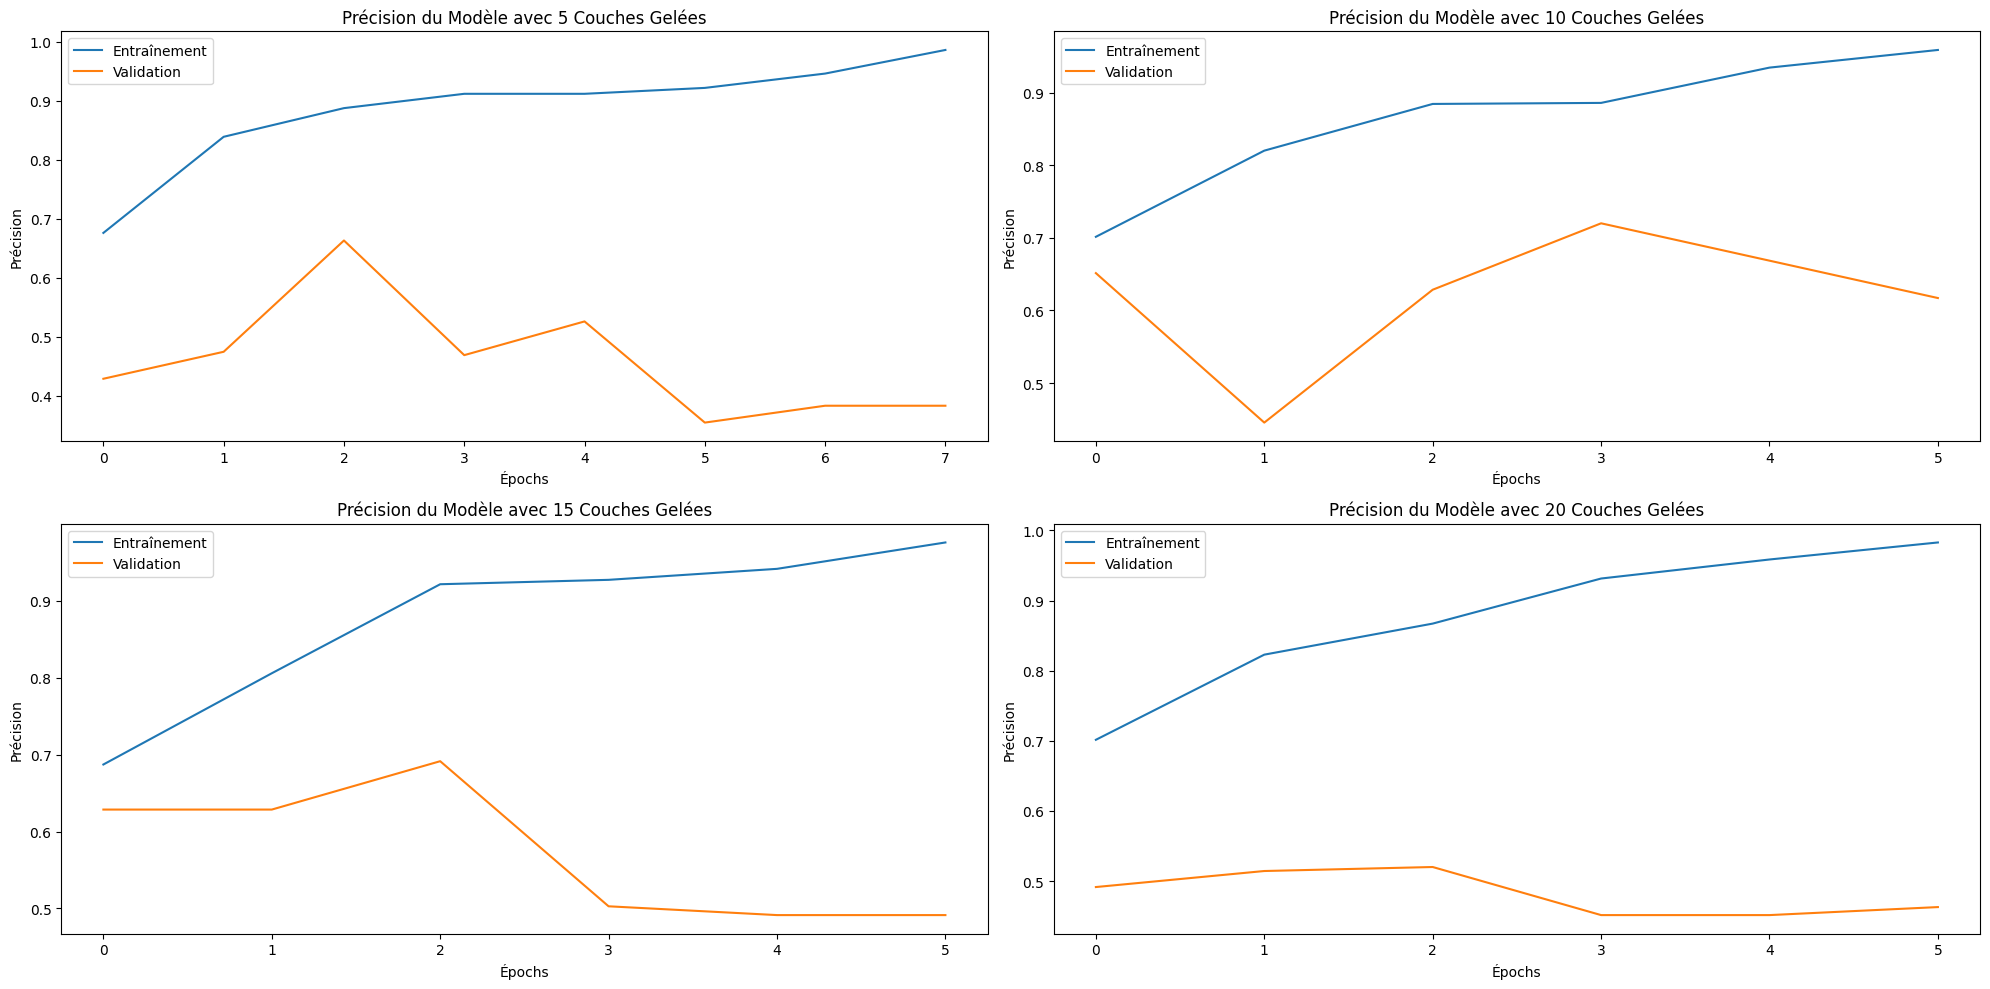

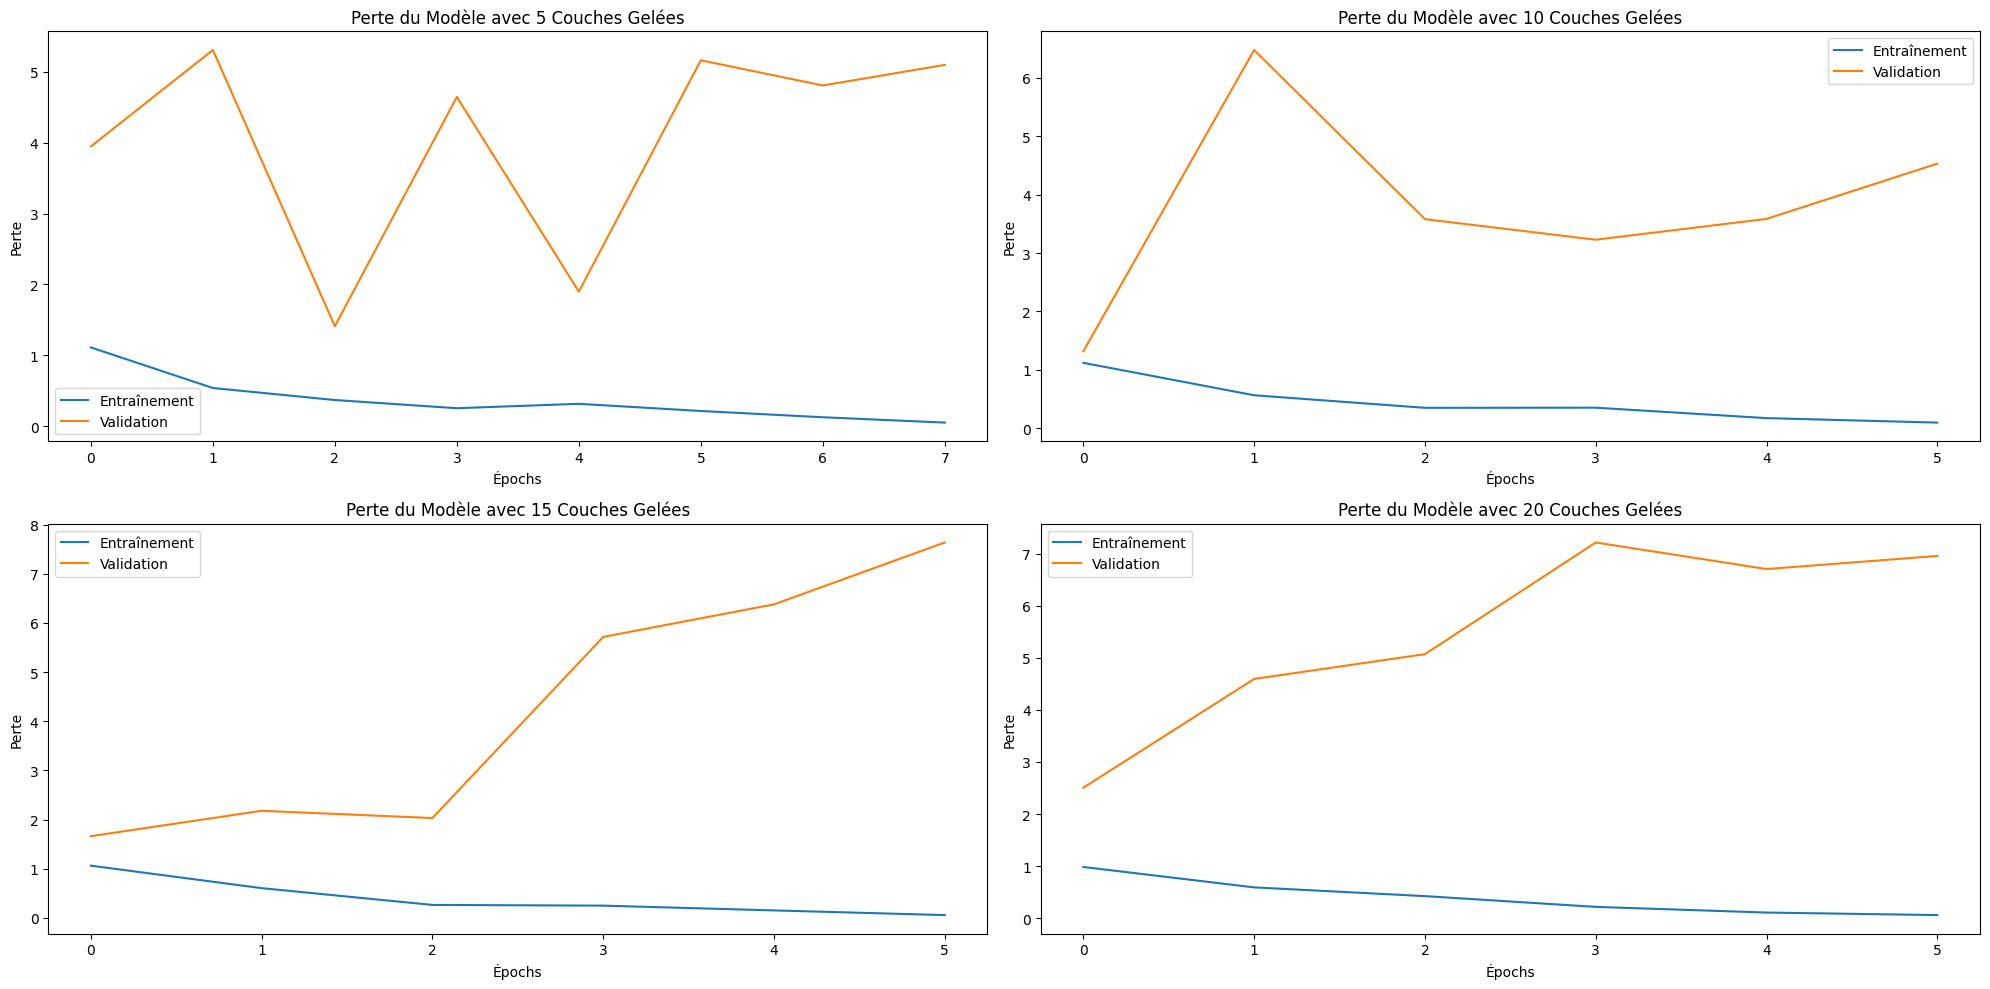

In [18]:
#### MOBILEVNET KHFIF WRESSOURCE LIMITE TSAWER ZGHAR 

best_val_accuracy = 0
best_model = None
best_frozen_layers = None
histories = {}  # Dictionnaire pour stocker l'historique de chaque configuration
confusion_matrices = {}

for frozen_layers in [5, 10, 15, 20]:   ## YLAWEJ 3ALA AHSEN COUCHE
    base_model = MobileNetV2(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), include_top=False, weights='imagenet')  #CREATION MODELE
    for layer in base_model.layers[:frozen_layers]:
        layer.trainable = False

    model_mobilenetv2 = Sequential([
        base_model,
        GlobalAveragePooling2D(),      #Remplace les couches denses par un pooling global pour réduire la taille des paramètres
        BatchNormalization(),    #accelere l'operation
        Dense(256, activation='relu'),        #ajoute une couche  connectée avec 256 neurones pour capter des carac complexes
        Dropout(0.5),  #REDUIT SURPARRENTISSAGE
        Dense(len(class_names), activation='softmax')
    ])
    model_mobilenetv2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    callbacks = [                                                                                       #COMPILATION +CALLBACKS
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)
    ]

    history = model_mobilenetv2.fit(train_dataset, validation_data=validation_dataset, epochs=10, callbacks=callbacks, verbose=1)
    histories[frozen_layers] = history  # Stocker l'historique

    val_accuracy = max(history.history['val_accuracy'])
    print(f"Validation accuracy avec {frozen_layers} couches gelées : {val_accuracy}")    ####EVALUATION

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model = model_mobilenetv2
        best_frozen_layers = frozen_layers

    val_labels = np.concatenate([y.numpy() for x, y in validation_dataset], axis=0)
    y_pred = model_mobilenetv2.predict(validation_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(np.argmax(val_labels, axis=1), y_pred_classes)
    confusion_matrices[frozen_layers] = cm

print(f"Meilleur nombre de couches gelées : {best_frozen_layers} avec une validation accuracy de {best_val_accuracy}")

# *** Visualisation des Courbes d'Apprentissage ***
plt.figure(figsize=(20, 10))

for frozen_layers, history in histories.items():
    plt.subplot(2, len(histories)//2, list(histories.keys()).index(frozen_layers) + 1)
    plt.plot(history.history['accuracy'], label='Entraînement')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Précision du Modèle avec {frozen_layers} Couches Gelées')
    plt.xlabel('Épochs')
    plt.ylabel('Précision')
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))

for frozen_layers, history in histories.items():
    plt.subplot(2, len(histories)//2, list(histories.keys()).index(frozen_layers) + 1)
    plt.plot(history.history['loss'], label='Entraînement')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'Perte du Modèle avec {frozen_layers} Couches Gelées')
    plt.xlabel('Épochs')
    plt.ylabel('Perte')
    plt.legend()

plt.tight_layout()
plt.show()

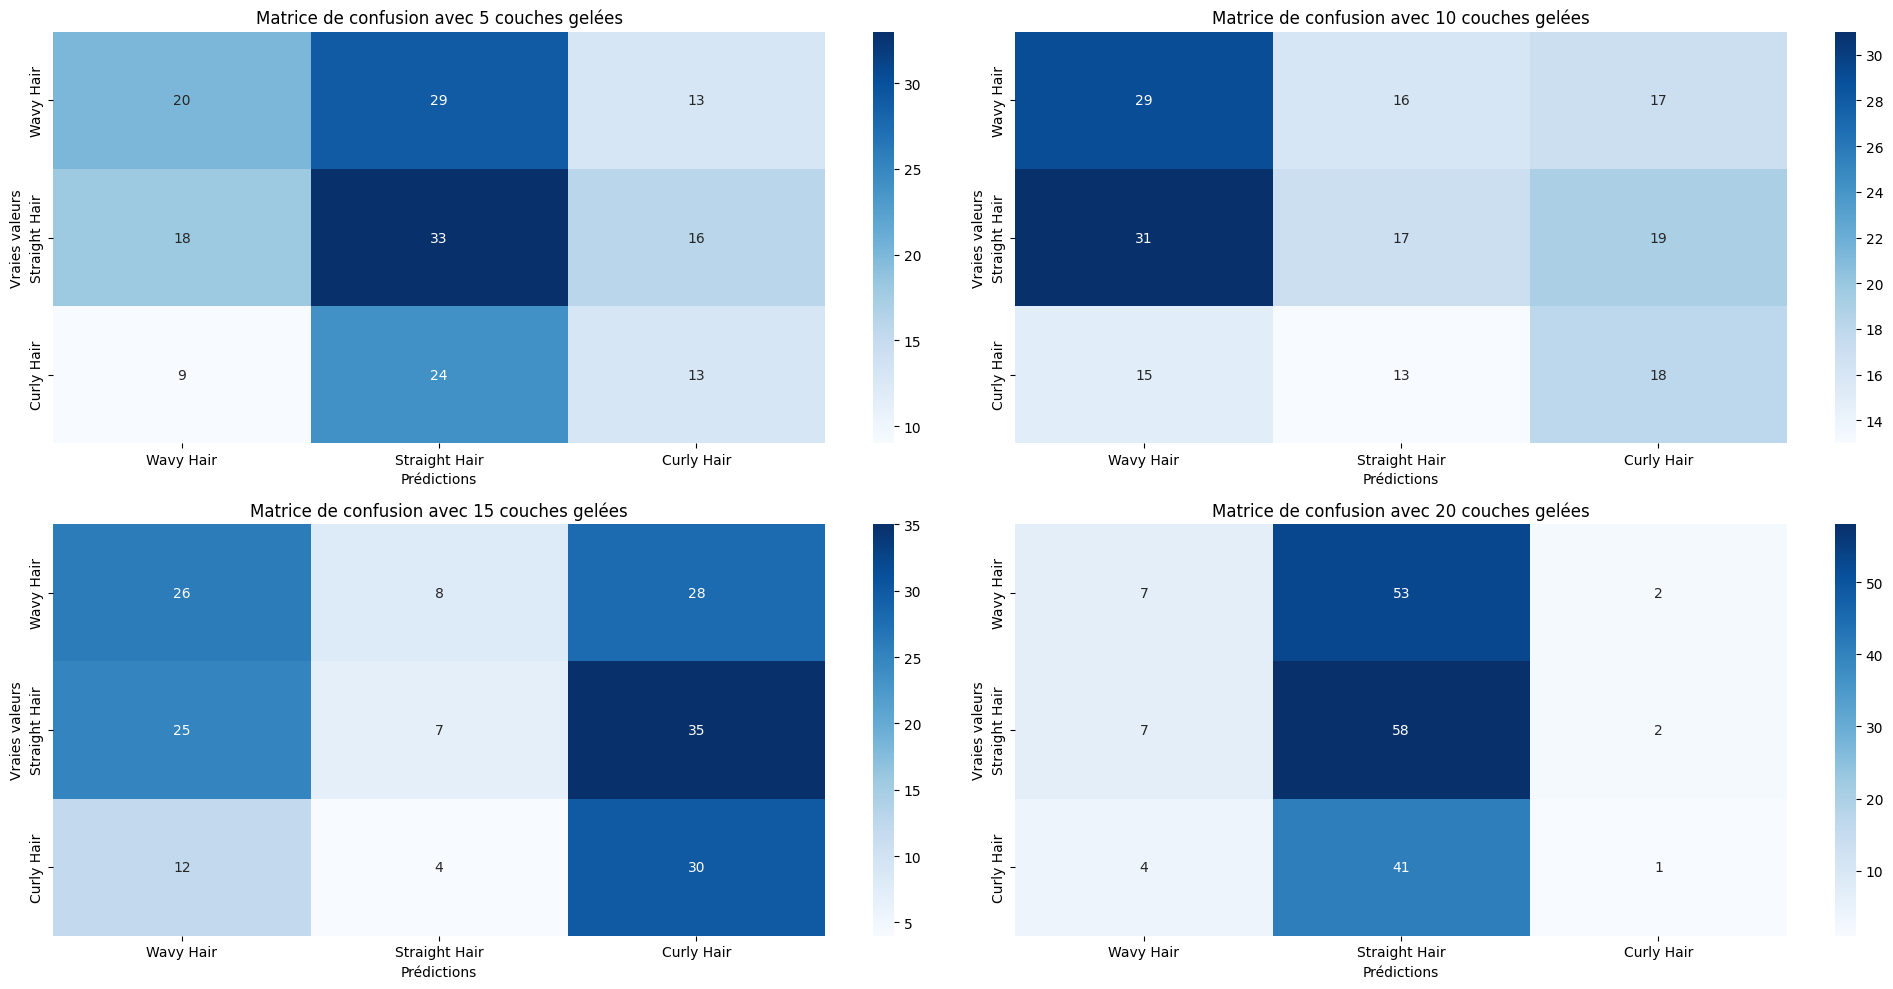

In [19]:
# Afficher les matrices de confusion
plt.figure(figsize=(20, 10))

for i, (frozen_layers, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, len(confusion_matrices)//2, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies valeurs')
    plt.title(f'Matrice de confusion avec {frozen_layers} couches gelées')

plt.tight_layout()
plt.show()

In [20]:
# Sauvegarder le meilleur modèle
best_model.save('best_model_mobilenetv2.keras')

In [21]:
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
best_model = load_model('/content/best_model_mobilenetv2.keras')

In [22]:
best_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,695,371 (29.36 MB)

 Trainable params: 2,551,779 (9.73 MB)

 Non-trainable params: 40,032 (156.38 KB)

 Optimizer params: 5,103,560 (19.47 MB)

### Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


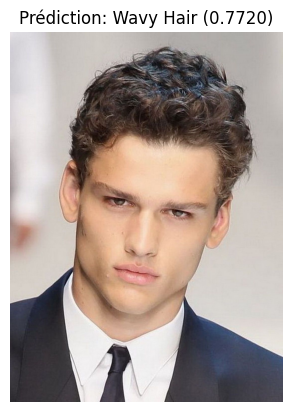

In [23]:
# Prédictions sur une image
def prepare_image(img_path):
    img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

def predict_image(model, img_path):
    img_array = prepare_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    return class_names[predicted_class], predictions[0][predicted_class]

image_path = '/content/Data/Wavy Hair/096bc77c82488482558a824382d9c816.jpg'
predicted_label, confidence = predict_image(best_model, image_path)

img = load_img(image_path)
plt.imshow(img)
plt.title(f'Prédiction: {predicted_label} ({confidence:.4f})')
plt.axis('off')
plt.show()

# Model Concatination

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.6687 - loss: 1.3450 - val_accuracy: 0.3829 - val_loss: 7554.8193 - learning_rate: 0.0010
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 65s 317ms/step - accuracy: 0.7554 - loss: 1.0532 - val_accuracy: 0.3829 - val_loss: 288475.0625 - learning_rate: 0.0010
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - accuracy: 0.8390 - loss: 0.9153 - val_accuracy: 0.3486 - val_loss: 5343285.0000 - learning_rate: 0.0010
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - accuracy: 0.8406 - loss: 1.1383 - val_accuracy: 0.3829 - val_loss: 295387.7812 - learning_rate: 0.0010
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 309ms/step - accuracy: 0.8725 - loss: 1.2296 - val_accuracy: 0.6400 - val_loss: 188.0967 - learning_rate: 2.0000e-04
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step - accuracy: 0.9702 - loss: 0.2895 - val_accuracy: 0.6629 - val_loss: 84.4384 - learning_rate: 2.0000e-04
Epoch

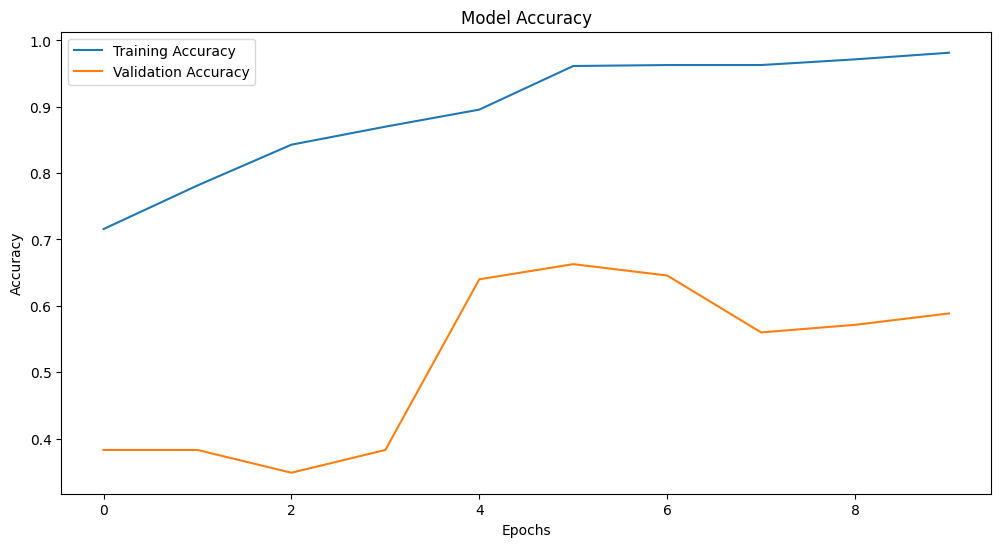

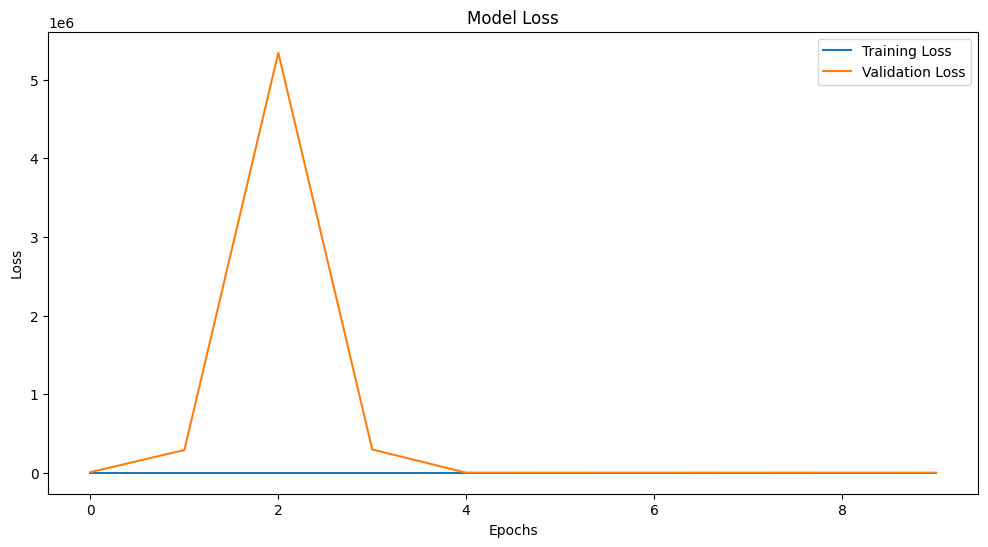

In [24]:
from tensorflow.keras.applications import InceptionV3, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Dropout, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
frozen_layers_inception = 15  # Number of layers to freeze in InceptionV3
frozen_layers_mobilenet = 15  # Number of layers to freeze in MobileNetV2
input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)

# Define the shared input layer
input_layer = Input(shape=input_shape)

# InceptionV3 branch
base_model_inception = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')
for layer in base_model_inception.layers[:frozen_layers_inception]:
    layer.trainable = False
x1 = base_model_inception(input_layer)
x1 = GlobalAveragePooling2D()(x1)
x1 = BatchNormalization()(x1)

# MobileNetV2 branch
base_model_mobilenet = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
for layer in base_model_mobilenet.layers[:frozen_layers_mobilenet]:
    layer.trainable = False
x2 = base_model_mobilenet(input_layer)
x2 = GlobalAveragePooling2D()(x2)
x2 = BatchNormalization()(x2)

# Concatenate the outputs of the two models
concatenated = Concatenate()([x1, x2])

# Add fully connected layers
x = Dense(512, activation='relu')(concatenated)
x = Dropout(0.5)(x)
output_layer = Dense(len(class_names), activation='softmax')(x)

# Define the combined model
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)
]

# Train the combined model
history = combined_model.fit(train_dataset, validation_data=validation_dataset, epochs=10, callbacks=callbacks, verbose=1)

# Evaluate and calculate confusion matrix
val_labels = np.concatenate([y.numpy() for x, y in validation_dataset], axis=0)
y_pred = combined_model.predict(validation_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(val_labels, axis=1), y_pred_classes)
print("Confusion Matrix:\n", cm)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
# Sauvegarder le meilleur modèle
best_model.save('best_concat_model.keras')

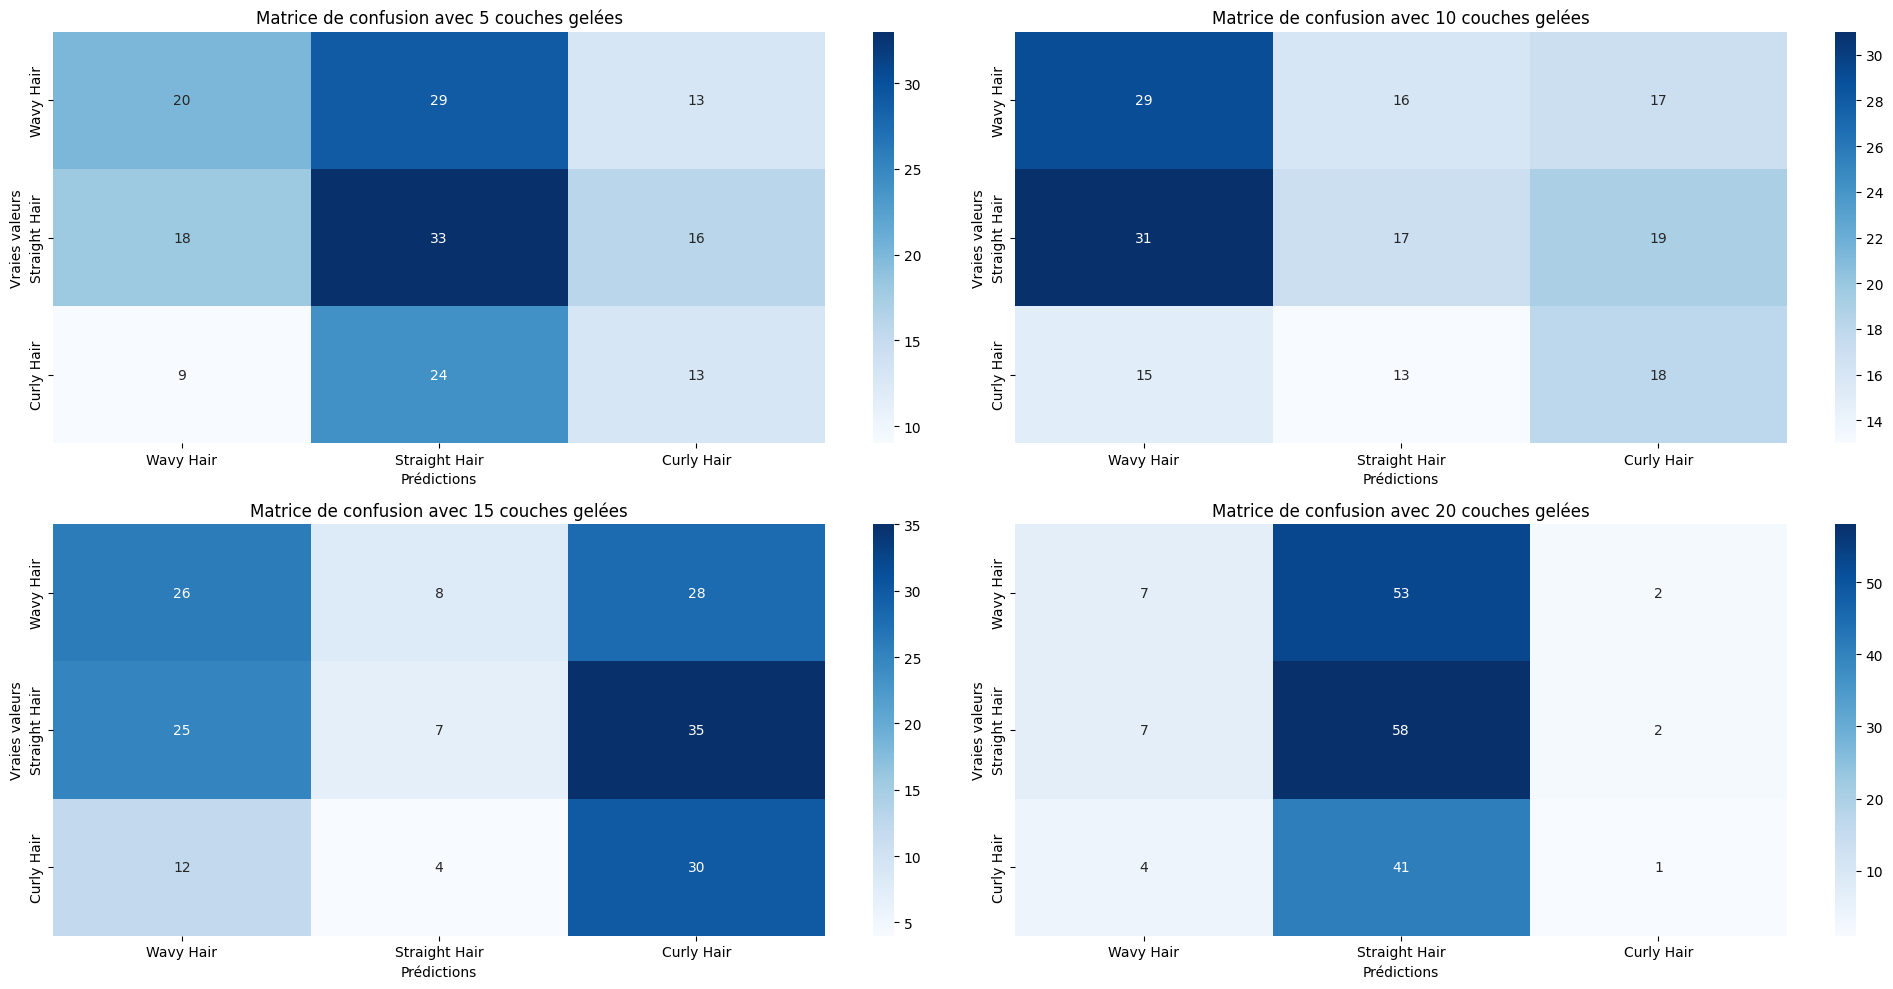

In [26]:
# Afficher les matrices de confusion
plt.figure(figsize=(20, 10))

for i, (frozen_layers, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, len(confusion_matrices)//2, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies valeurs')
    plt.title(f'Matrice de confusion avec {frozen_layers} couches gelées')

plt.tight_layout()
plt.show()

In [27]:
# Charger le modèle sauvegardé
best_model = load_model('/content/best_concat_model.keras') # Load the model using load_model

In [28]:
#2-	Structure des couches

#- Total de paramètres: 51,993,603 (198.34 MB)
best_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,695,371 (29.36 MB)

 Trainable params: 2,551,779 (9.73 MB)

 Non-trainable params: 40,032 (156.38 KB)

 Optimizer params: 5,103,560 (19.47 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


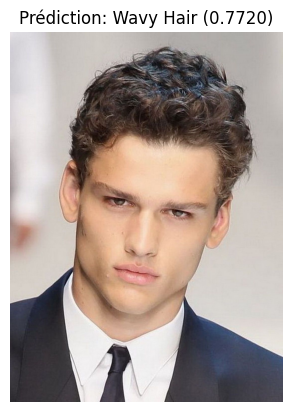

In [29]:
# Prédictions sur une image
def prepare_image(img_path):
    img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

def predict_image(model, img_path):
    img_array = prepare_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    return class_names[predicted_class], predictions[0][predicted_class]

image_path = '/content/Data/Wavy Hair/096bc77c82488482558a824382d9c816.jpg'
predicted_label, confidence = predict_image(best_model, image_path)

img = load_img(image_path)
plt.imshow(img)
plt.title(f'Prédiction: {predicted_label} ({confidence:.4f})')
plt.axis('off')
plt.show()